# Quantization Benchmark Results Viewer

This notebook loads and displays results from a quantization benchmark analysis folder.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Image, display

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. Select Analysis Folder

Change this to your analysis folder path:

In [1]:
# Change this to your analysis folder
analysis_folder = "/Users/JackYu_1/Desktop/genomeocean/Nov 16 results/100M_run"  # Example timestamp

In [ ]:
# Or list all available analysis folders
results_dir = Path("./results")
analysis_folders = sorted([f for f in results_dir.glob("analysis_*") if f.is_dir()])
print("Available analysis folders:")
for i, folder in enumerate(analysis_folders):
    print(f"{i}: {folder.name}")

# Use the most recent one
if analysis_folders:
    analysis_folder = str(analysis_folders[-1])
    print(f"\nUsing: {analysis_folder}")

## 2. Performance Summary

Main performance metrics by quantization mode:

In [3]:
# Load performance summary
quant_summary = pd.read_csv(f"{analysis_folder}/quant_summary.csv")
print("\n=== Performance Summary ===")
display(quant_summary)


=== Performance Summary ===


,Unnamed: 0,seqs_per_s,seqs_per_s.1,seqs_per_s.2,seqs_per_s.3,tokens_per_s,tokens_per_s.1,tokens_per_s.2,tokens_per_s.3,peak_vram_GB,peak_vram_GB.1,peak_vram_GB.2,peak_vram_GB.3,E2EL_ms,E2EL_ms.1,E2EL_ms.2,E2EL_ms.3,avg_power_W,avg_power_W.1,avg_power_W.2,avg_power_W.3,tokens_per_watt,tokens_per_watt.1,tokens_per_watt.2,tokens_per_watt.3
0,NaN,mean,std,min,max,mean,std,min,max,mean,std,min,max,mean,std,min,max,mean,std,min,max,mean,std,min,max
1,quantization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4bit_fp4,46.233,0.093,46.146,46.33,94606.253,189.385,94427.04,94804.39,2.057,0.0,2.057,2.057,86.518,0.173,86.337,86.682,274.593,11.092,261.8,281.51,344.933,14.913,335.43,362.122
3,4bit_nf4,46.084,0.061,46.014,46.123,94300.583,124.845,94156.78,94381.25,2.053,0.0,2.053,2.053,86.798,0.115,86.724,86.931,267.477,5.012,261.83,271.4,352.644,6.797,347.757,360.406
4,4bit_nf4_double,45.863,0.128,45.776,46.01,93848.803,260.999,93669.74,94148.27,2.053,0.0,2.053,2.053,87.217,0.242,86.939,87.383,272.773,9.077,262.56,279.92,344.331,12.564,334.837,358.578
5,8bit,28.033,0.045,27.991,28.081,57364.097,92.06,57277.87,57461.05,1.747,0.0,1.747,1.747,142.687,0.229,142.446,142.902,272.947,9.688,262.11,280.77,210.337,7.269,204.654,218.528
6,standard,46.971,0.11,46.852,47.07,96114.903,225.174,95873.2,96318.75,2.225,0.0,2.225,2.225,85.16,0.2,84.979,85.374,264.553,11.652,251.1,271.4,363.813,17.139,353.258,383.588


## 3. Memory Analysis

In [4]:
# Load memory analysis
memory_analysis = pd.read_csv(f"{analysis_folder}/memory_analysis.csv")
print("\n=== Memory Analysis ===")
display(memory_analysis)


=== Memory Analysis ===


,quantization,mean,std,min,max
0,4bit_fp4,2.057,0.0,2.057,2.057
1,4bit_nf4,2.053,0.0,2.053,2.053
2,4bit_nf4_double,2.053,0.0,2.053,2.053
3,8bit,1.747,0.0,1.747,1.747
4,standard,2.225,0.0,2.225,2.225


## 4. Throughput Comparison

In [5]:
# Load throughput comparison
throughput = pd.read_csv(f"{analysis_folder}/throughput_comparison.csv")
print("\n=== Throughput Comparison ===")
display(throughput)


=== Throughput Comparison ===


,Unnamed: 0,tokens_per_s,ratio_vs_standard,slowdown_pct
0,4bit_nf4_double,93848.803333,0.976423,2.357699
1,standard,96114.903333,1.000000,0.000000
2,4bit_nf4,94300.583333,0.981123,1.887657
3,8bit,57364.096667,0.596828,40.317168
4,4bit_fp4,94606.253333,0.984304,1.569632


## 5. Best Performers

In [6]:
# Load best performers
best_performers = pd.read_csv(f"{analysis_folder}/best_performers.csv")
print("\n=== Best Performers ===")
display(best_performers)


=== Best Performers ===


,Unnamed: 0,quantization,batch_size,value
0,highest_throughput,standard,4,96318.750000
1,lowest_memory,8bit,4,1.747000
2,lowest_latency,standard,4,84.979000
3,most_energy_efficient,standard,4,383.588306


## 6. Quality Metrics (if available)

In [7]:
# Load quality metrics if available
quality_file = Path(f"{analysis_folder}/quality_metrics.csv")
if quality_file.exists():
    quality_metrics = pd.read_csv(quality_file)
    print("\n=== Quality Metrics ===")
    display(quality_metrics)
else:
    print("No quality metrics available (quality evaluation was skipped)")


=== Quality Metrics ===


,quantization_mode,layer,kl_divergence,js_divergence,cosine_similarity,mse,mae,snr_db,pearson_correlation
0,4bit_nf4_double,last,0.003011,0.000572,0.948072,0.048980,0.172900,9.907227,0.948074
1,4bit_nf4_double,second_last,0.003812,0.001014,0.913657,0.002026,0.035280,7.177734,0.913615
2,4bit_nf4,last,0.003011,0.000572,0.948072,0.048980,0.172900,9.907227,0.948074
3,4bit_nf4,second_last,0.003812,0.001014,0.913657,0.002026,0.035280,7.177734,0.913615
4,8bit,last,0.000117,0.000024,0.999428,0.000549,0.018160,29.414062,0.999428
5,8bit,second_last,0.000156,0.000028,0.998869,0.000024,0.003832,26.425781,0.998868
6,4bit_fp4,last,0.004774,0.001217,0.887442,0.113830,0.263200,6.245117,0.887441
7,4bit_fp4,second_last,0.022221,0.005416,0.814746,0.004480,0.053040,3.730469,0.814639


## 7. Visualizations

Display all generated plots:


### Cosine Similarity


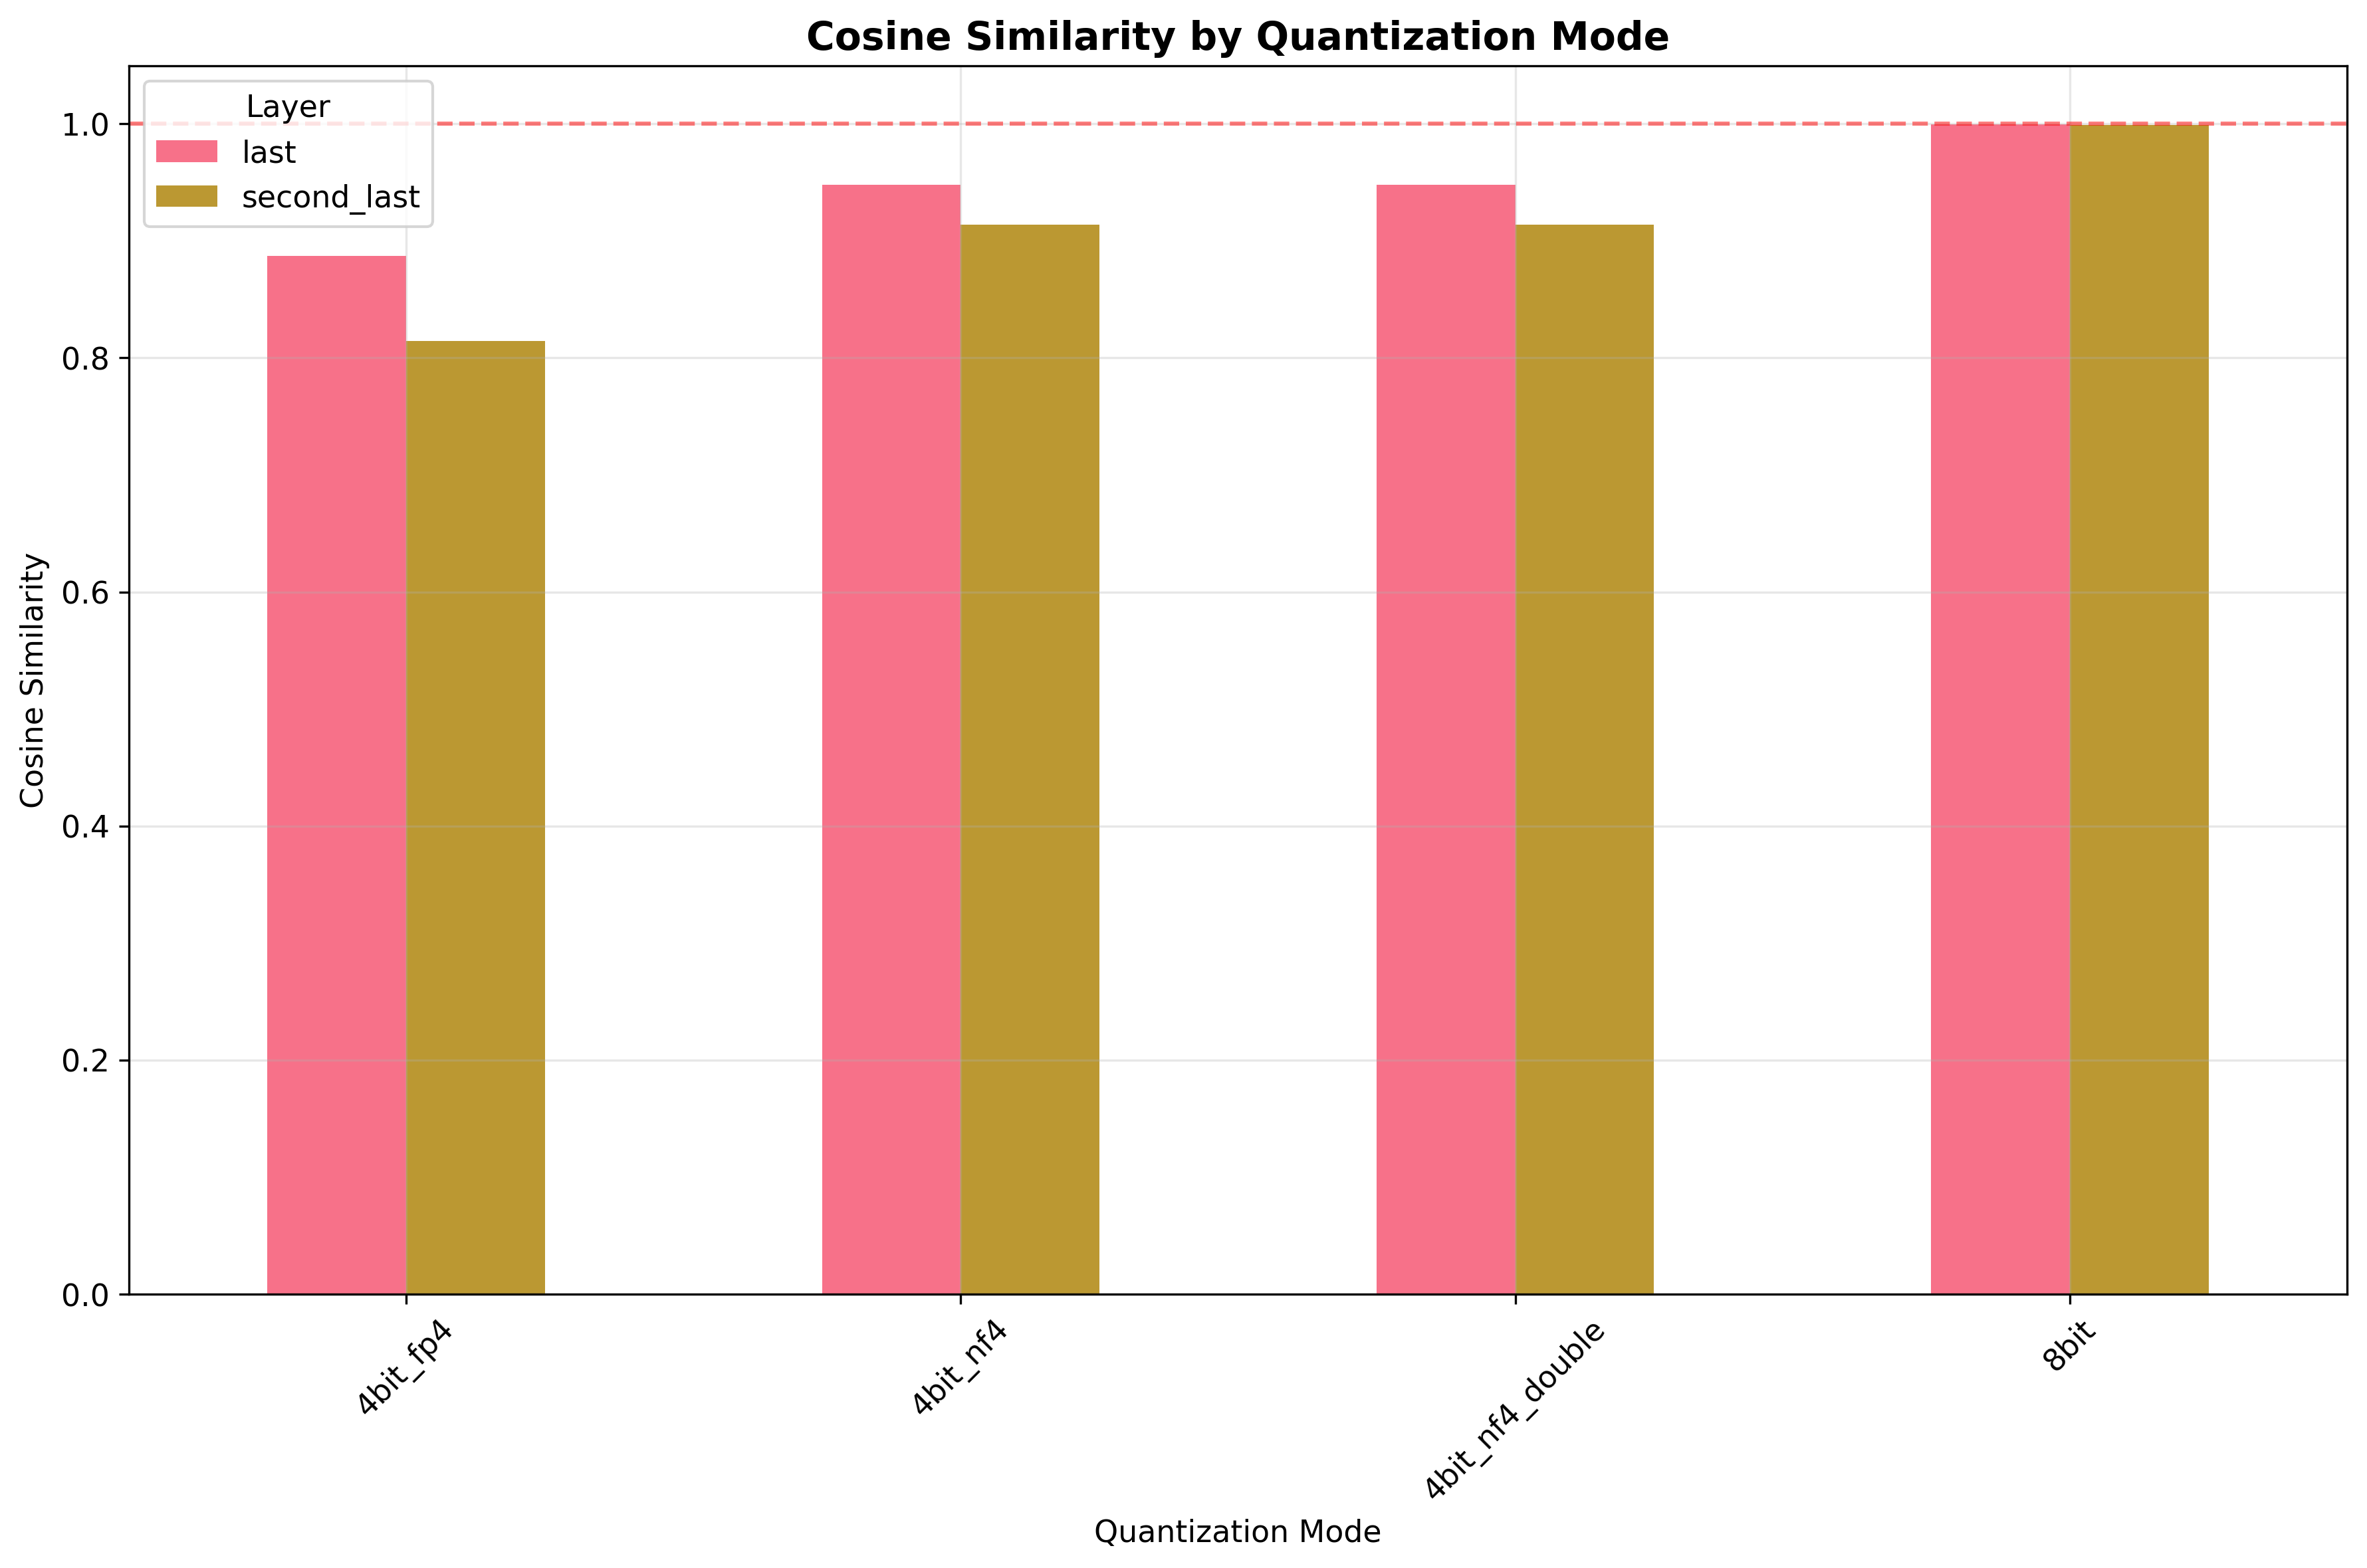


### Divergence Comparison


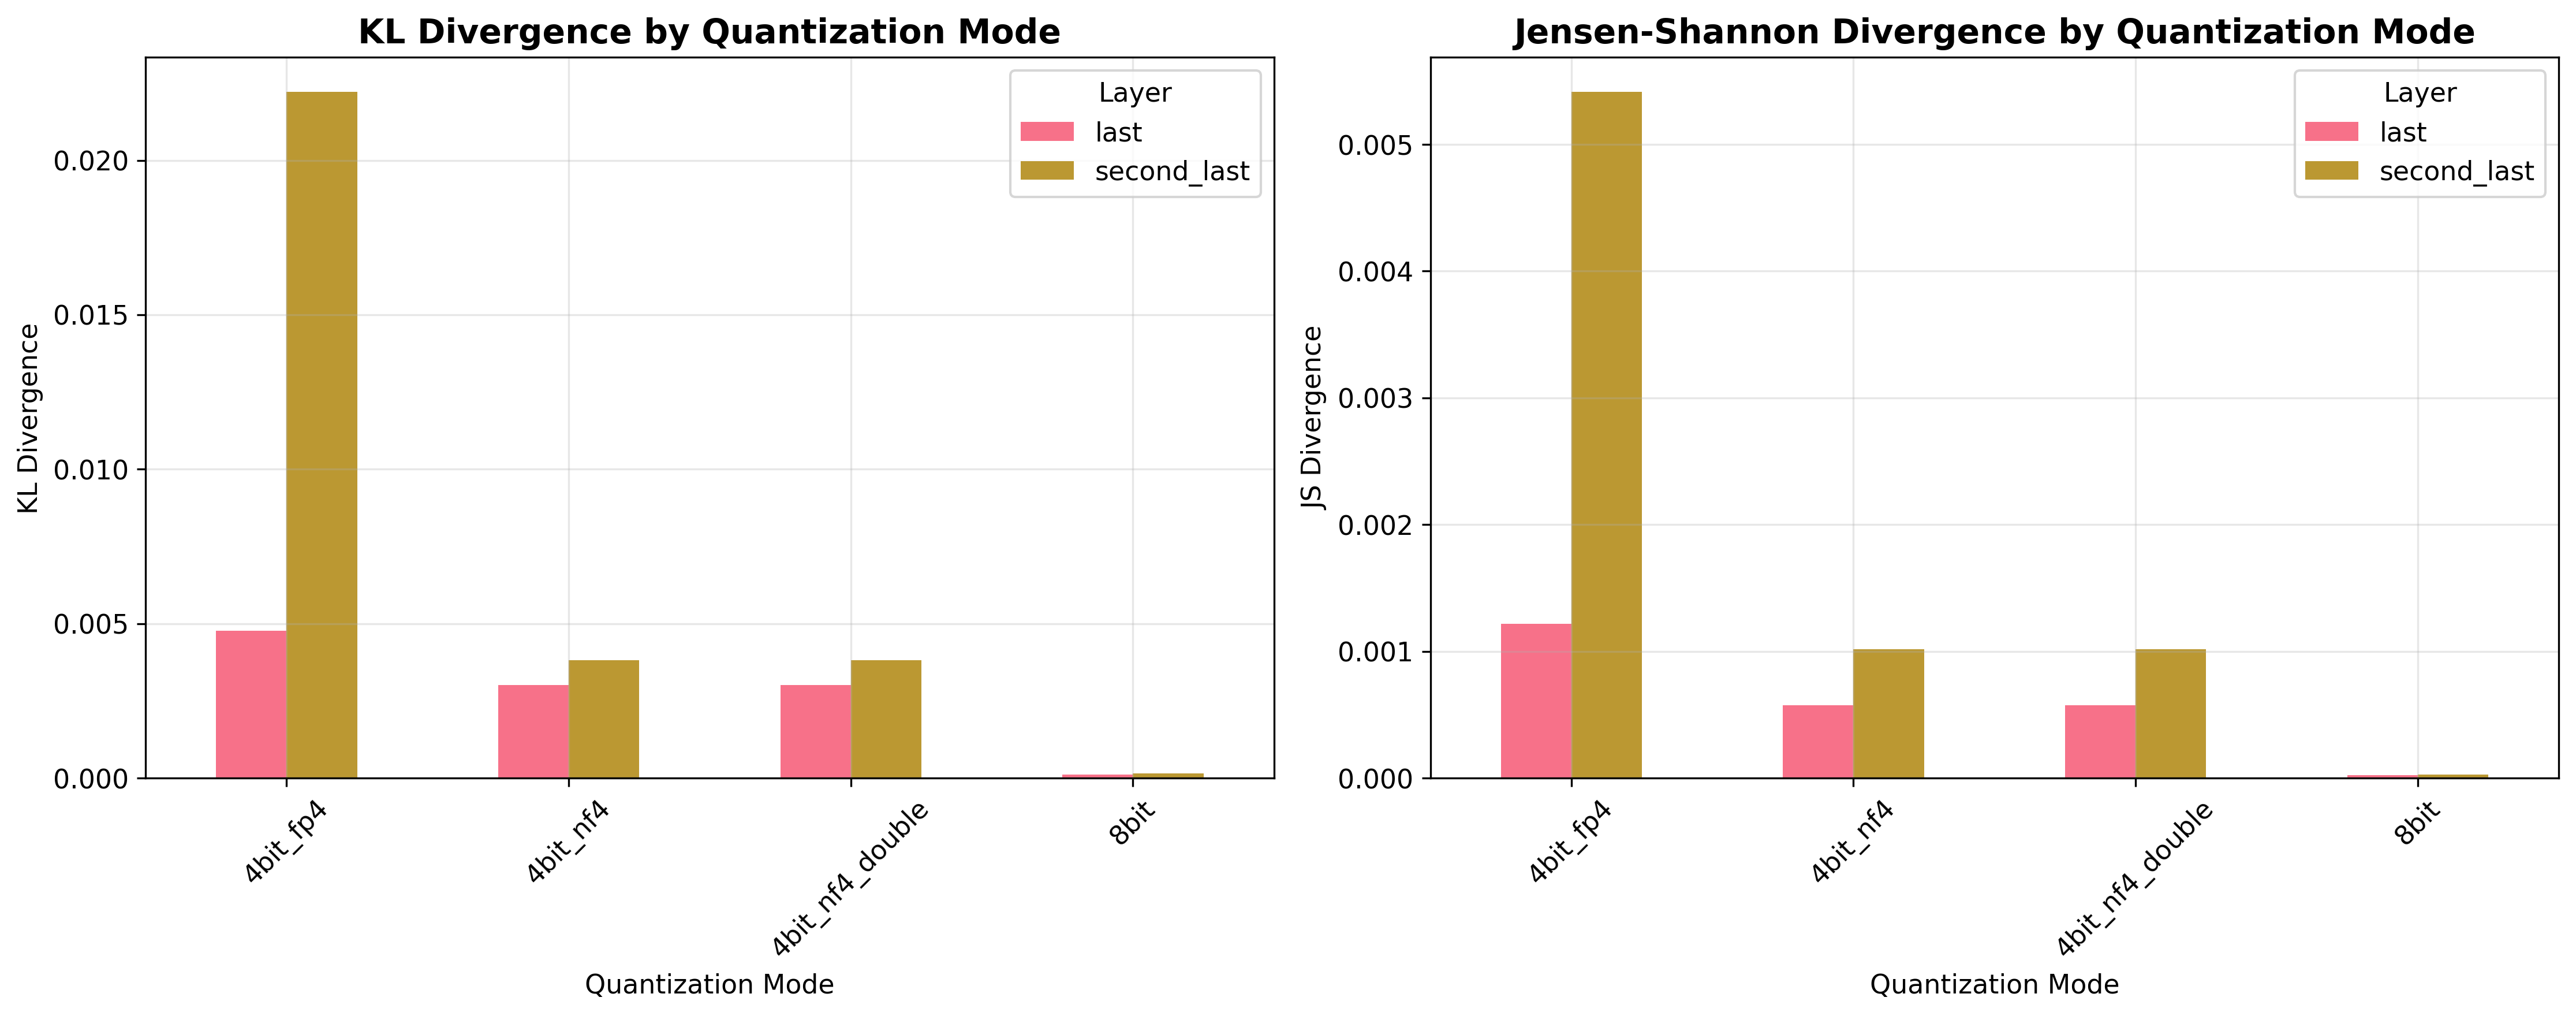


### Quality Metrics Last


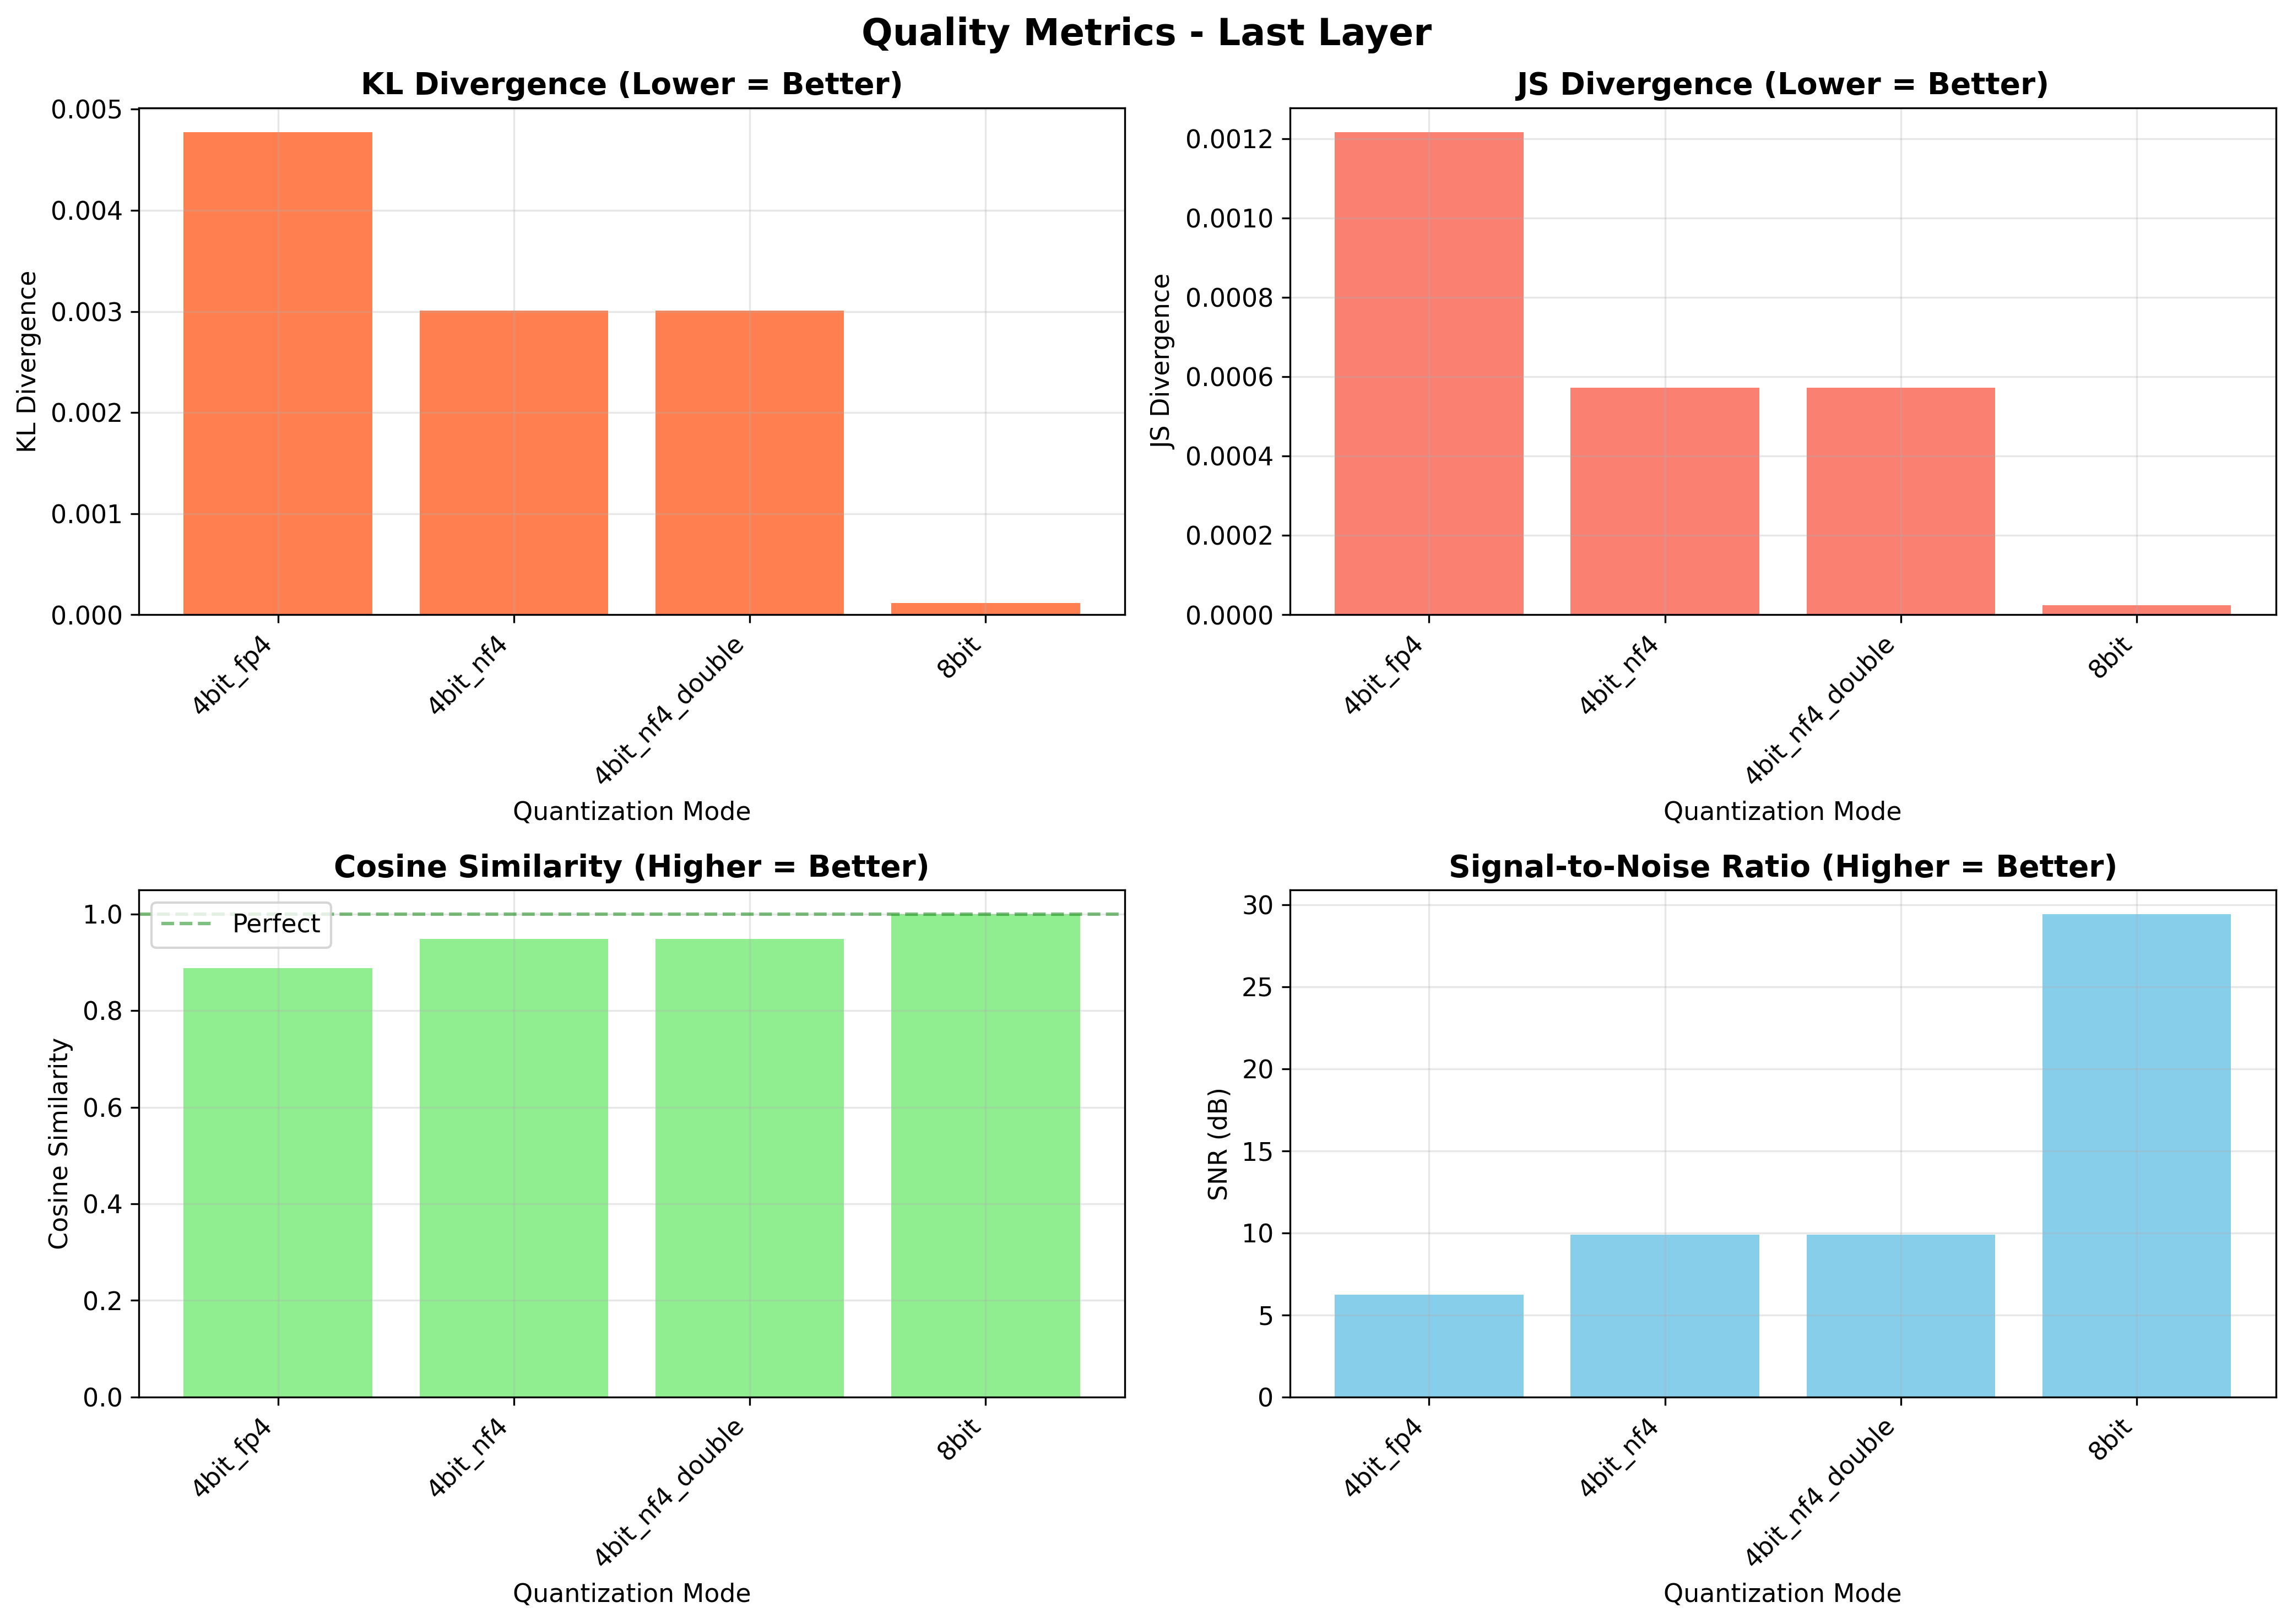


### Quality Metrics Second Last


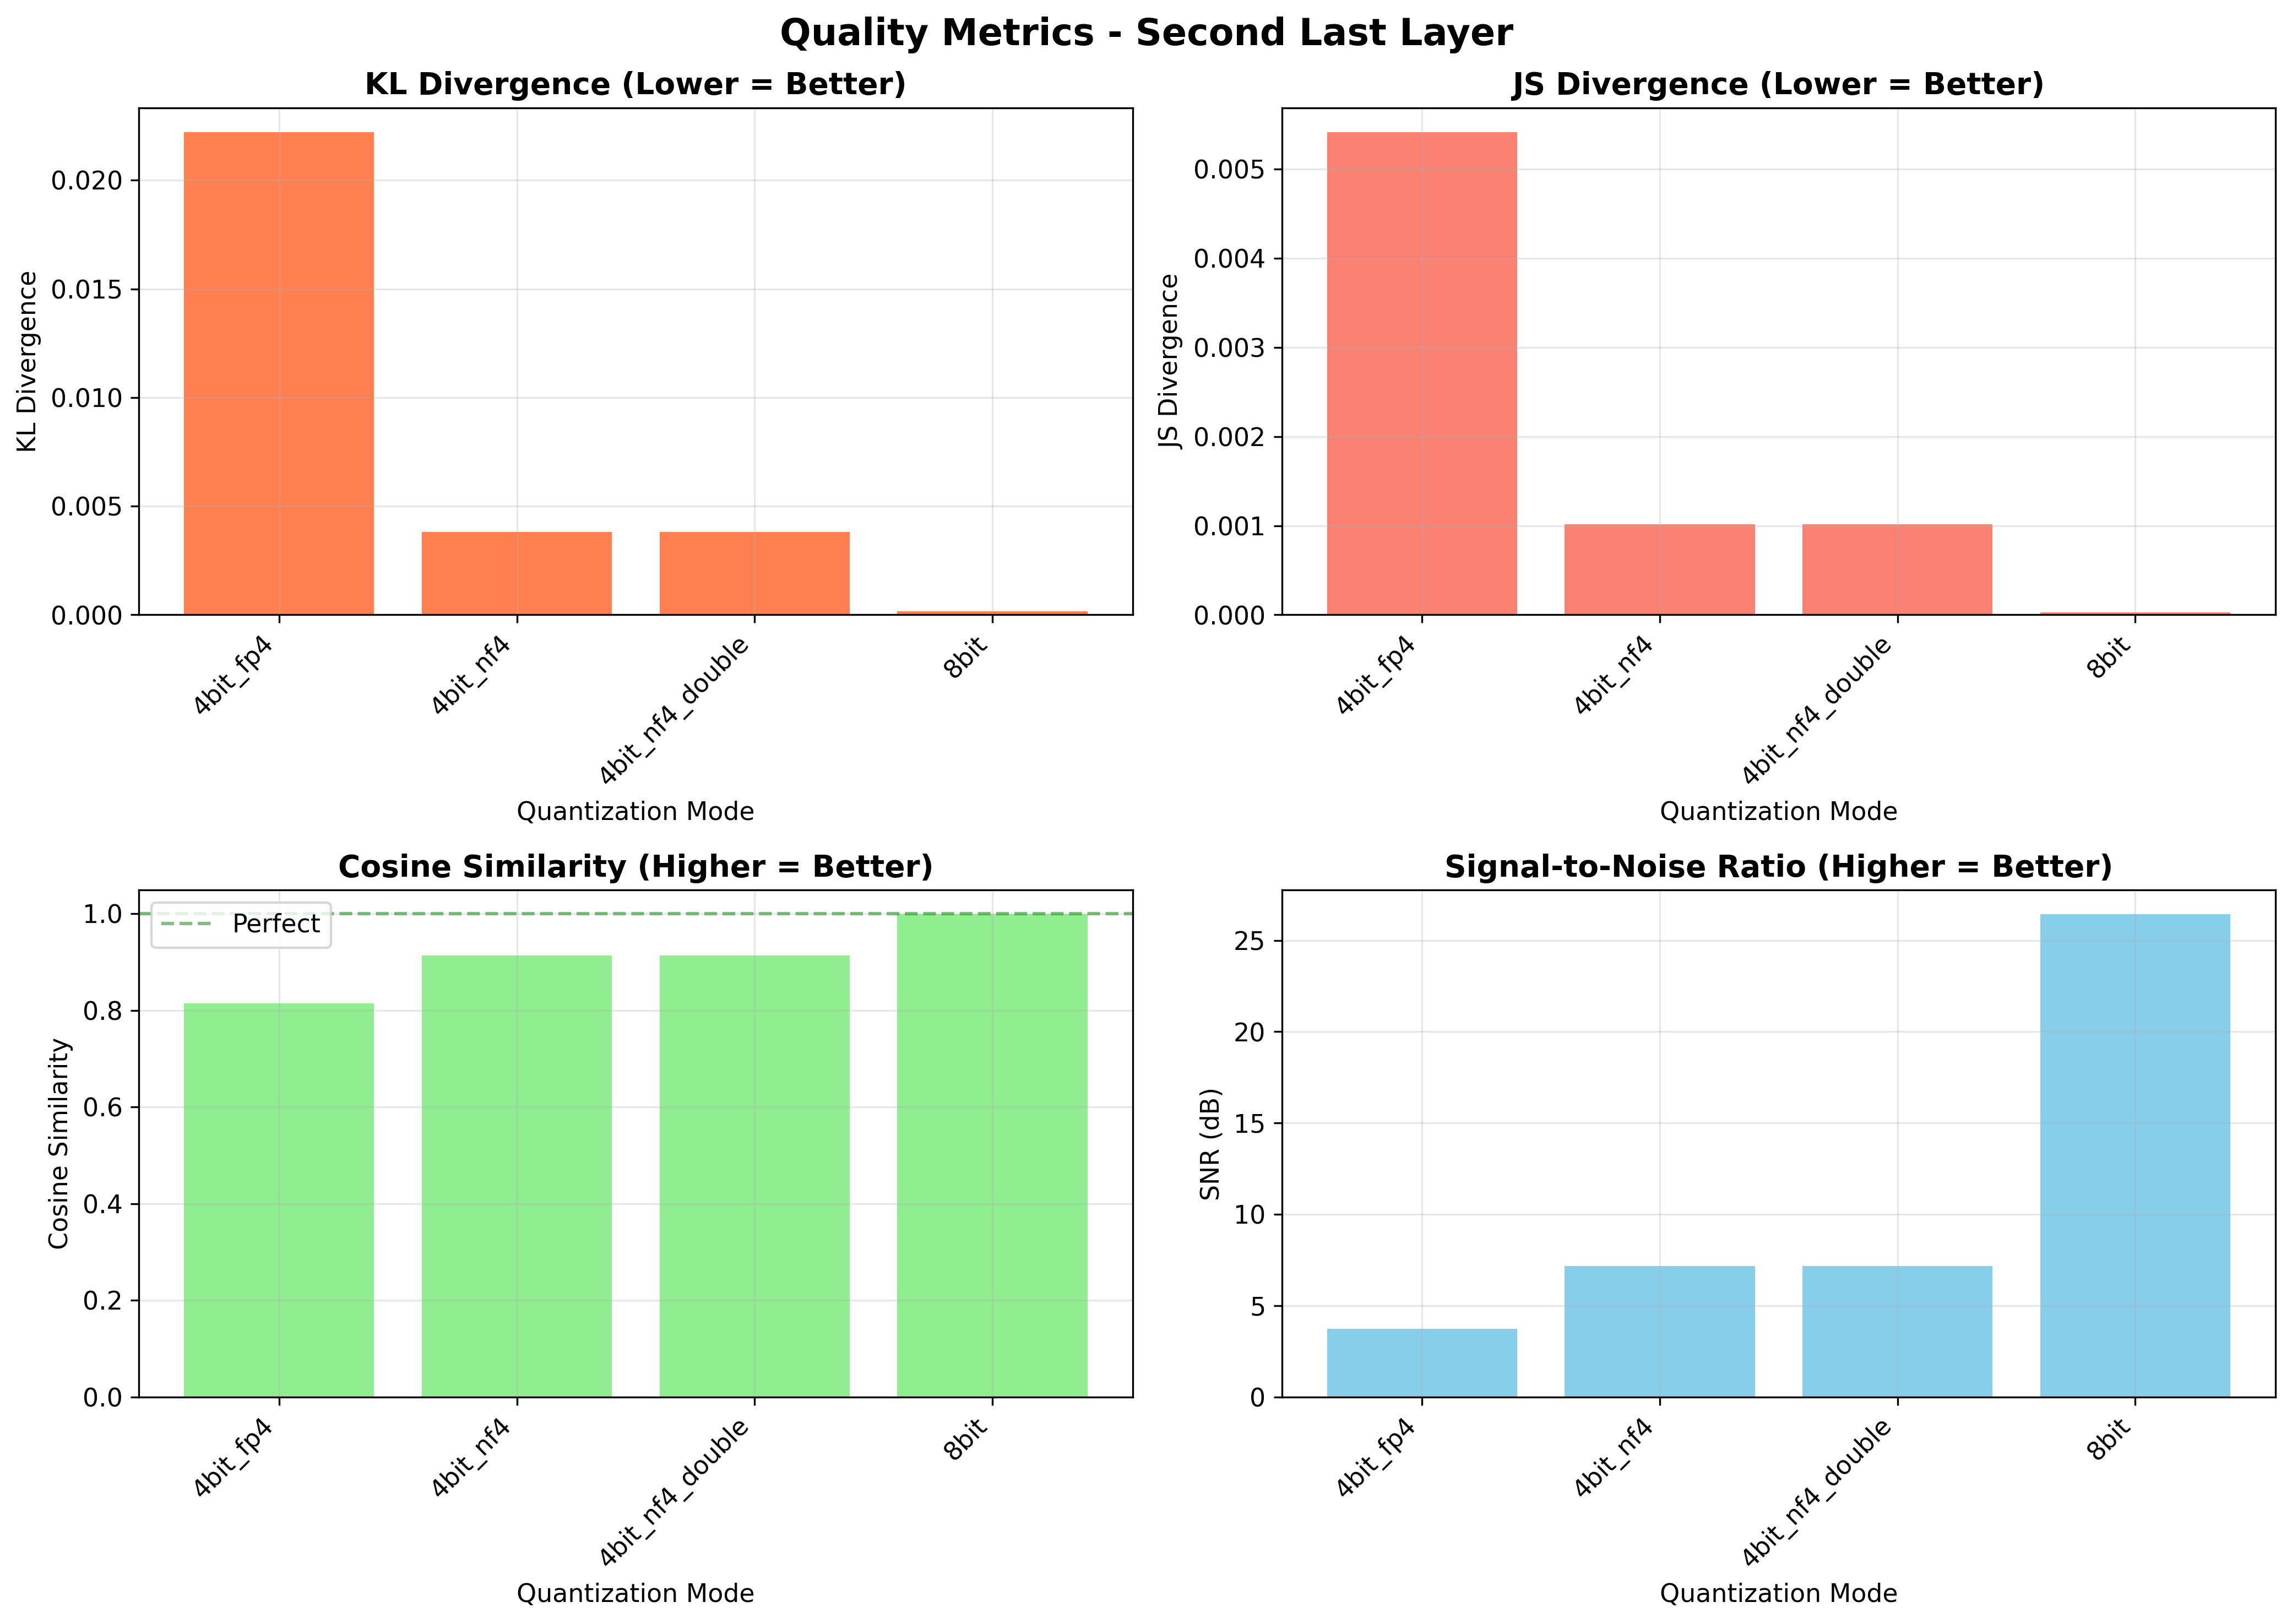


### Snr Comparison


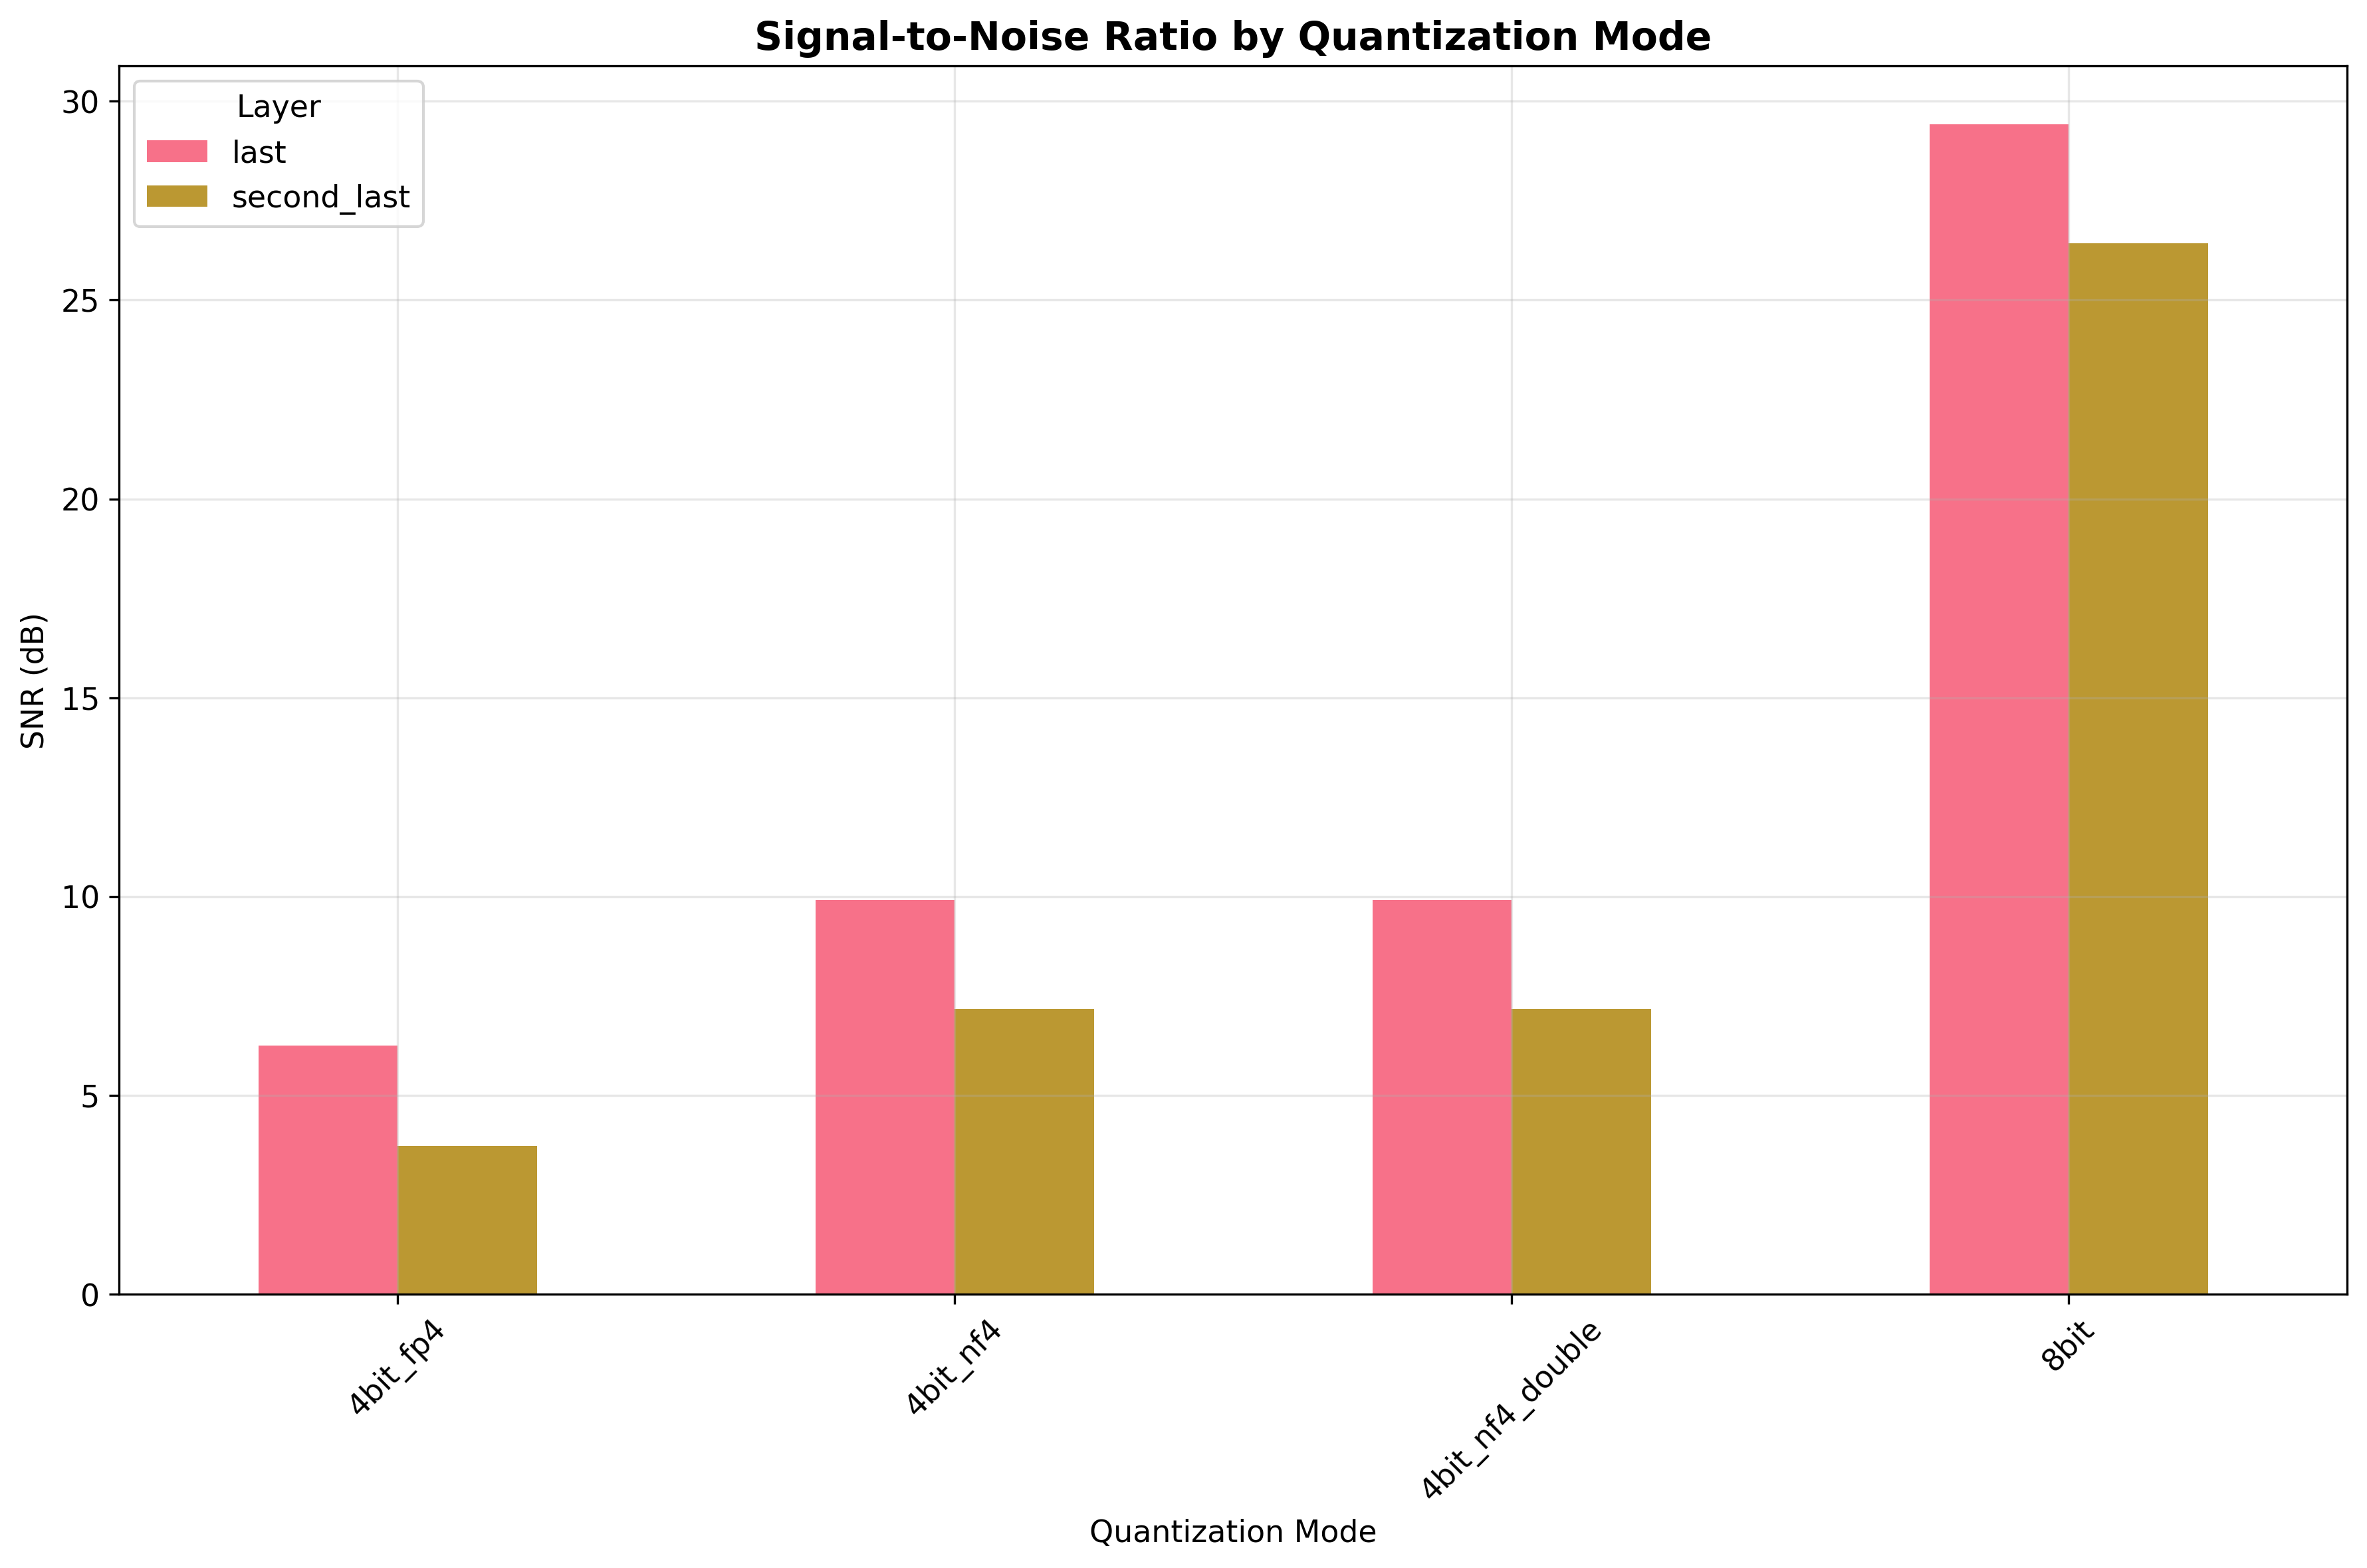

In [8]:
# Display all PNG files
plot_files = sorted(Path(analysis_folder).glob("*.png"))

for plot_file in plot_files:
    print(f"\n### {plot_file.stem.replace('_', ' ').title()}")
    display(Image(filename=str(plot_file)))

## 8. Performance Report

Full text report:

In [9]:
# Display performance report
report_file = Path(f"{analysis_folder}/performance_report.txt")
if report_file.exists():
    with open(report_file, 'r') as f:
        print(f.read())
else:
    print("No performance report found")

QUANTIZATION PERFORMANCE ANALYSIS

PERFORMANCE SUMMARY
----------------------------------------
                seqs_per_s                        tokens_per_s                              peak_vram_GB                     E2EL_ms                          avg_power_W                         tokens_per_watt                          
                      mean    std     min     max         mean      std       min       max         mean  std    min    max     mean    std      min      max        mean     std     min     max            mean     std      min      max
quantization                                                                                                                                                                                                                               
4bit_fp4            46.233  0.093  46.146  46.330    94606.253  189.385  94427.04  94804.39        2.057  0.0  2.057  2.057   86.518  0.173   86.337   86.682     274.593  11.092  261.80  281.51   

## 9. Custom Analysis

Add your own analysis here:

In [10]:
# Example: Plot tokens/s vs memory
if 'tokens_per_s_mean' in quant_summary.columns and 'peak_vram_GB_mean' in quant_summary.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(quant_summary['peak_vram_GB_mean'], quant_summary['tokens_per_s_mean'])
    
    for idx, row in quant_summary.iterrows():
        plt.annotate(row['quantization'], 
                    (row['peak_vram_GB_mean'], row['tokens_per_s_mean']),
                    xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('Peak VRAM (GB)')
    plt.ylabel('Tokens per Second')
    plt.title('Performance vs Memory Tradeoff')
    plt.grid(True, alpha=0.3)
    plt.show()